In [45]:
from Helpers import *
from FLController import *
from ILQGController import *

In [46]:
def VerifyVel(X0 = [70,70],XN=[-10,100],less = 0,timings = [.5,.75,1],onlyILQG=False):
    start = ToCartesian(np.array(X0)/180*pi)
    end = ToCartesian(np.array(XN)/180*pi)
    plt.figure(dpi=100,figsize = (8,8))
    plt.scatter([end[0]],[end[1]],s= 50,color = "black")
    for timing in timings:
        K = int(timing/.01)
        xILQG,yILQG,uILQG,x = ILQG(timing,1e7,1e4,1e-4,end,K-less,start,Delay=0,plot = False)
        plt.plot(xILQG,yILQG,label = f"{int(timing*1000)}ms ILQG",color = (0.4*timing*1.5,0.8*(1.2-timing),0.2))
        if onlyILQG==True: plt.axis("equal")
        if onlyILQG==False : X,Y = Feedback_Linearization(timing,1e7,1e7,1e4,1e4,1e-4,1e-4,end,start,Num_iter=K,Delay = 0)
    plt.plot(np.linspace(start[0],end[0],100),np.linspace(start[1],end[1],100),color = "grey",alpha = .4,linestyle = "--")
    MultipleLabel()
    if end[1]>end[0]: 
        ax = plt.gca()  # Get current axes
        legend = ax.get_legend()
        legend.set_bbox_to_anchor((1, 0.3))  # Moves the legend to the right of the plot
    plt.show()
    plt.figure(figsize = (8,8))
    for timing in timings:
        K = int(timing/.01)
        xILQG,yILQG,uILQG,x = ILQG(timing,1e7,1e4,1e-4,end,K-less,start,Delay=0,plot=False)
        plt.plot(np.linspace(0,timing,x.shape[0]),x[:,2],label = "Shoulder ILQG",color = (0.51,0.25,0.7),linestyle = "-.")
        plt.plot(np.linspace(0,timing,x.shape[0]),x[:,3],label = "Elbow ILQG",color = (0.51,0.25,0.7))
        plt.plot(np.linspace(0,timing,100),np.zeros(100),color = "grey",linestyle = "--",linewidth = 1)
        if onlyILQG == False:
            X,Y,J,x = Feedback_Linearization(timing,1e7,1e7,1e4,1e4,1e-4,1e-4,end,start,Num_iter=K,plot = False,ShowJ=True)
            plt.plot(np.linspace(0,timing,x.shape[0]),x[:,2],label = "Shoulder FL",color = (0.44,0.91,0.86),linestyle = "-.")
            plt.plot(np.linspace(0,timing,x.shape[0]),x[:,3],label = "Elbow FL",color = (0.44,0.91,0.86))
            plt.plot(np.linspace(0,timing,100),np.zeros(100),linestyle = "--",linewidth = 1)
        MultipleLabel(title = "Velocity")
    plt.ylabel("Angular velocity [rad/s]")
    plt.xlabel("Time [sec]")
    ax = plt.gca()  # Get current axes
    legend = ax.get_legend()
    legend.set_bbox_to_anchor((1, 0.3))  # Moves the legend to the right of the plot

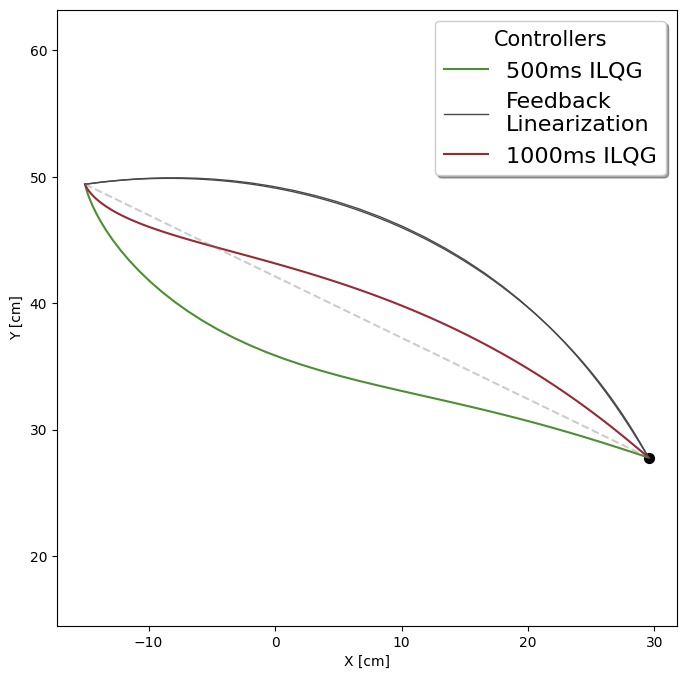

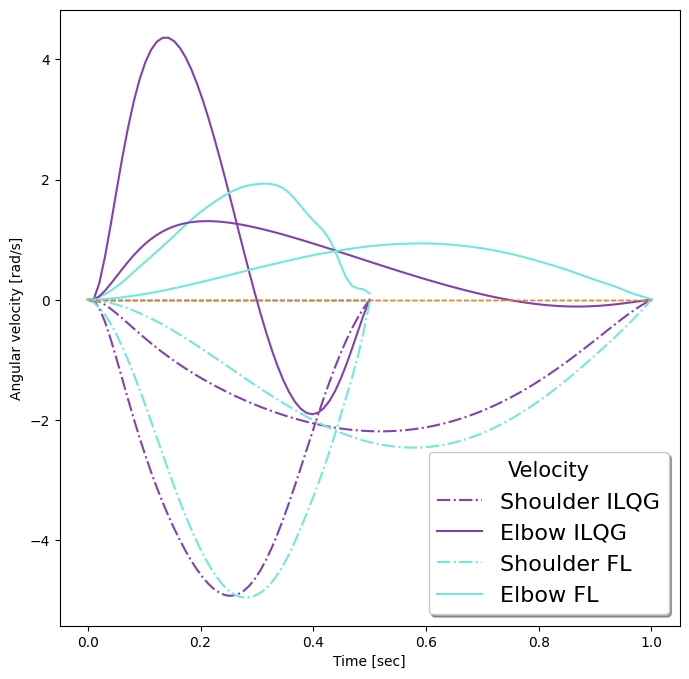

In [47]:
VerifyVel(timings= [0.5,1])

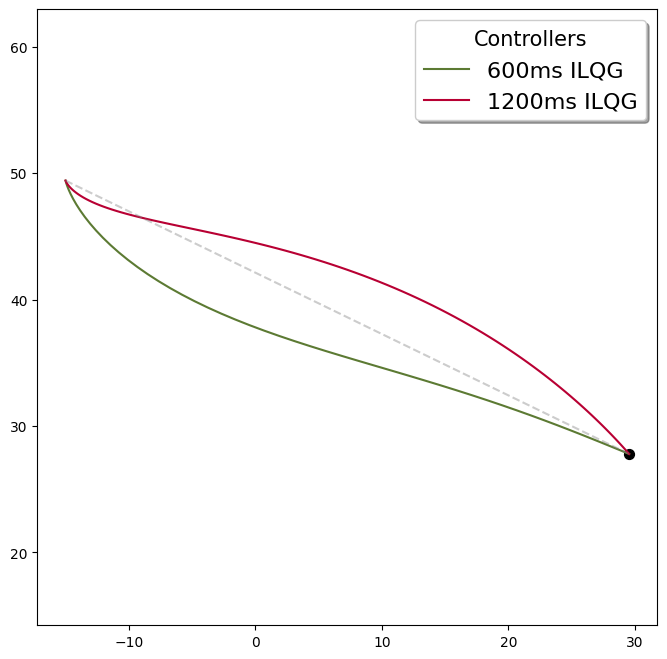

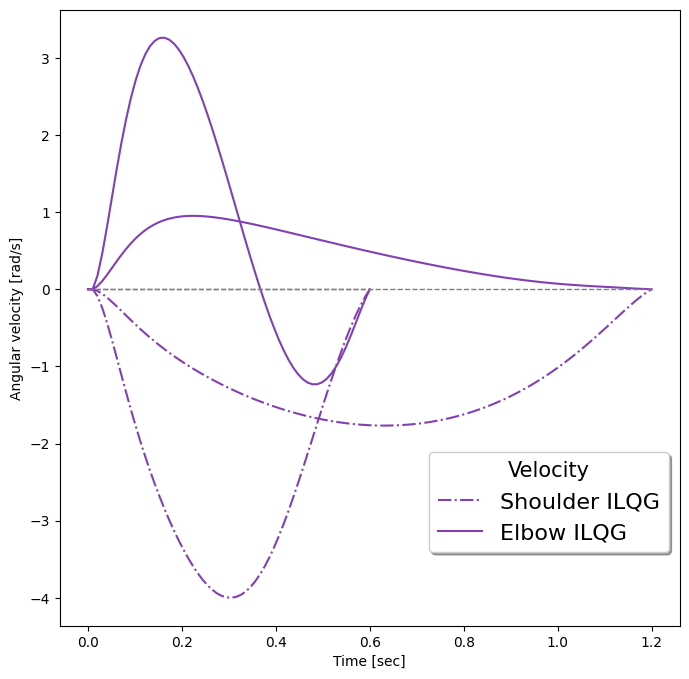

In [48]:
VerifyVel(timings=[.6,1.2],onlyILQG=True)

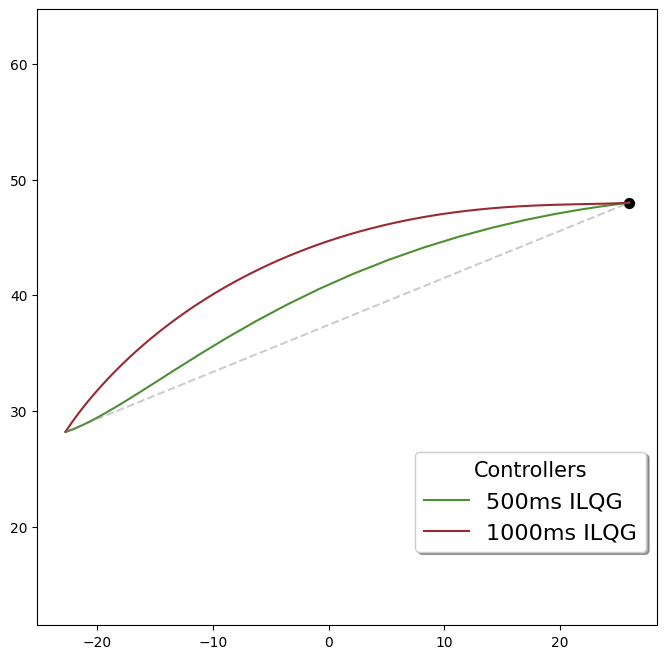

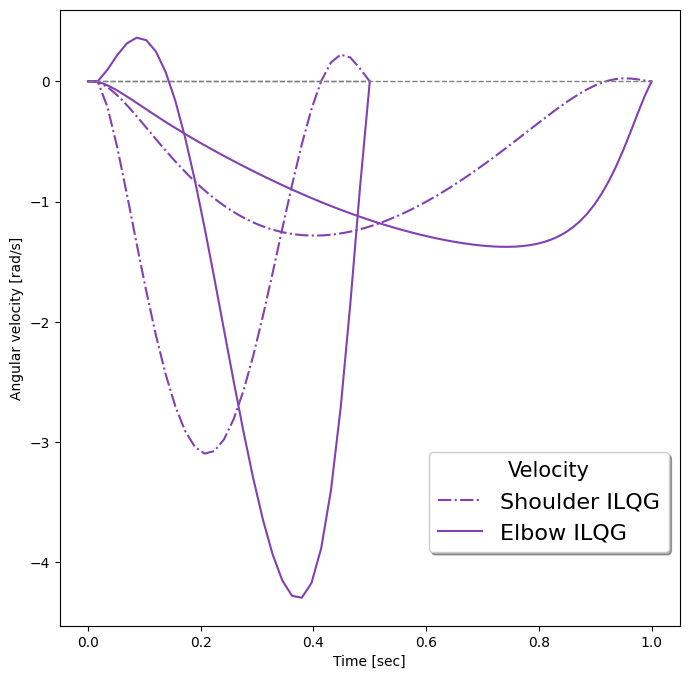

In [49]:
VerifyVel([70,110],[30,60],less = 20,timings=[.5,1],onlyILQG=True)


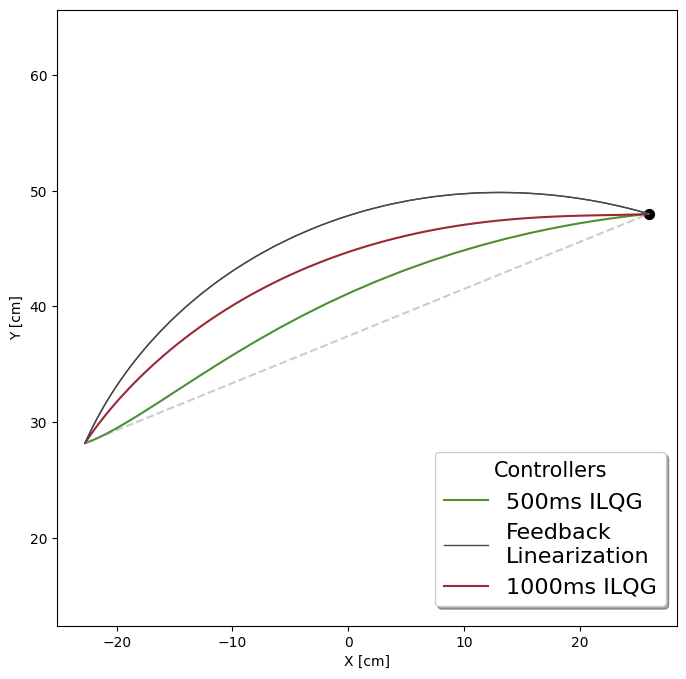

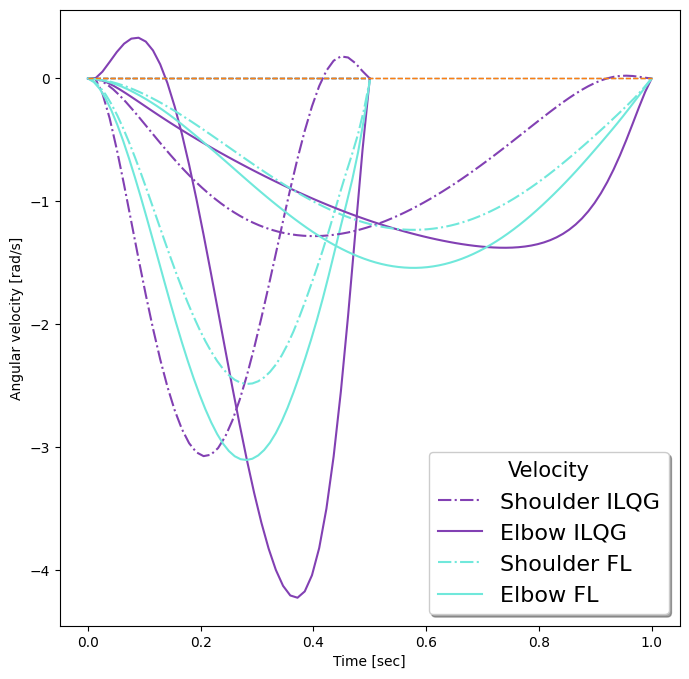

In [51]:
VerifyVel([70,110],[30,60],less = 10,timings = [.5,1])
